In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2  # for image processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # to show loading progress

# Path to dataset directory
dataset_path = "/content/drive/MyDrive/MangoLeafBD Dataset"
# Define image size (resize for uniformity)
IMG_SIZE = 128  # e.g., 128x128 pixels

# Initialize lists to store data and labels
data = []
labels = []

# Load images and their respective labels
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(folder)

# Convert to numpy arrays for easier manipulation
data = np.array(data)
labels = np.array(labels)
print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")

Loading Die Back: 100%|██████████| 500/500 [00:07<00:00, 70.59it/s] 


Data shape: (4010, 128, 128, 3), Labels shape: (4010,)


<ipython-input-3-72d20574e43e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_labels, x='class', palette='viridis')


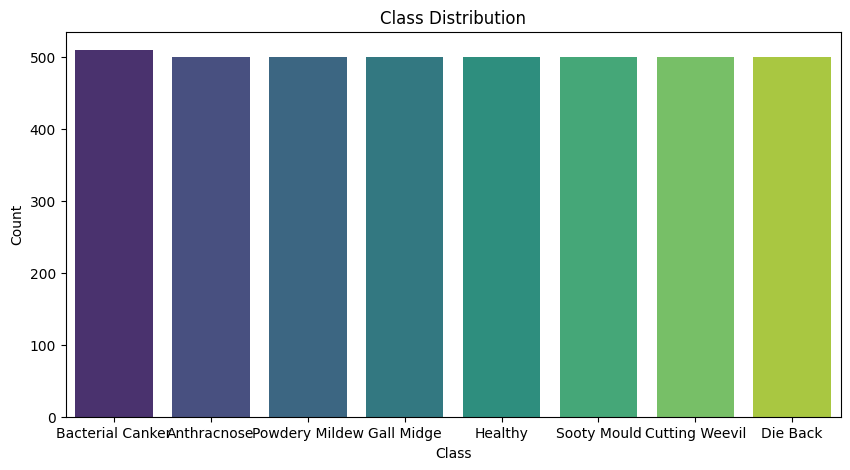

In [3]:
# Convert labels to a DataFrame for easier visualization
df_labels = pd.DataFrame(labels, columns=['class'])
plt.figure(figsize=(10, 5))
sns.countplot(data=df_labels, x='class', palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

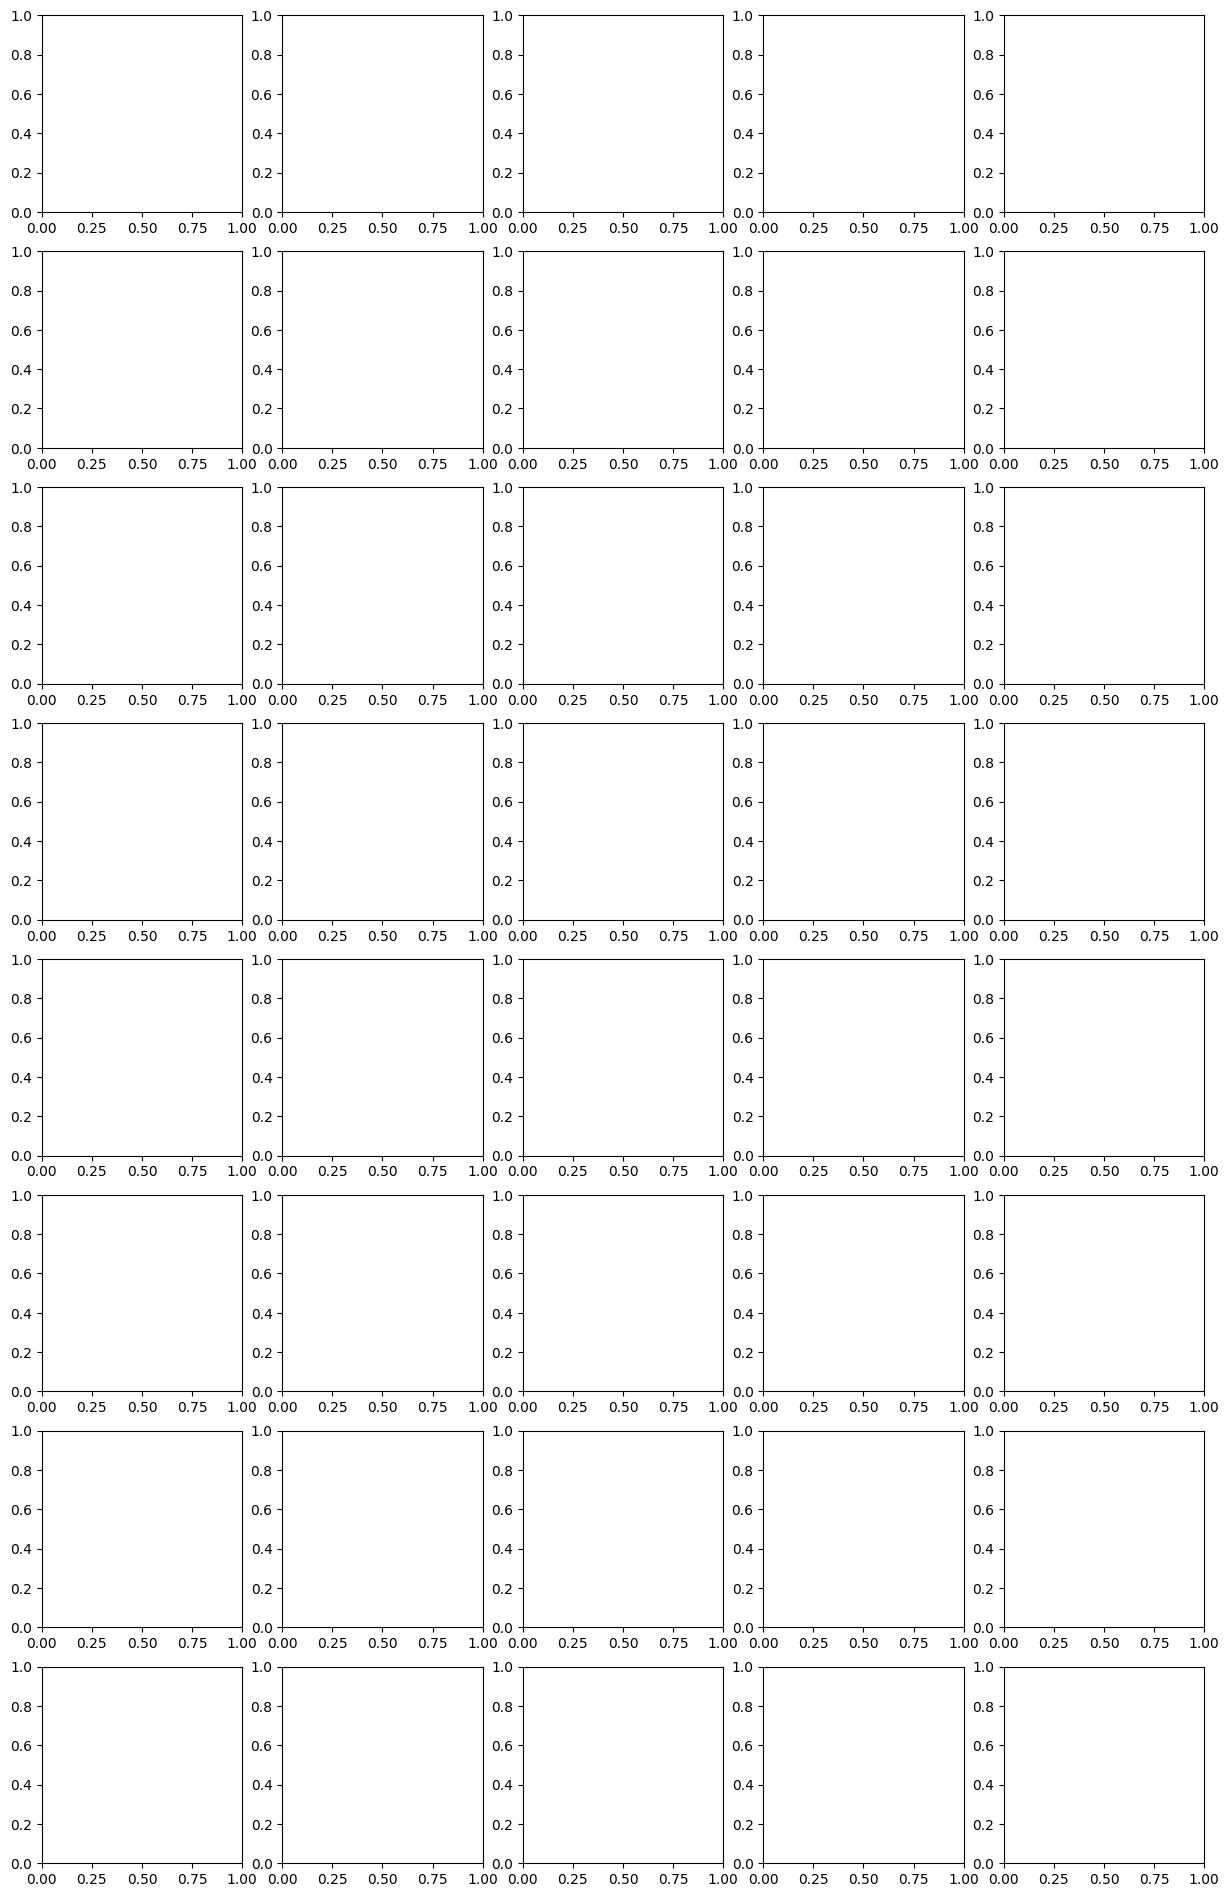

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' contains your class labels (e.g., from previous code)
classes = np.unique(labels)  # Extract unique class names

fig, ax = plt.subplots(len(classes), 5, figsize=(15, 6 * len(classes) // 2))

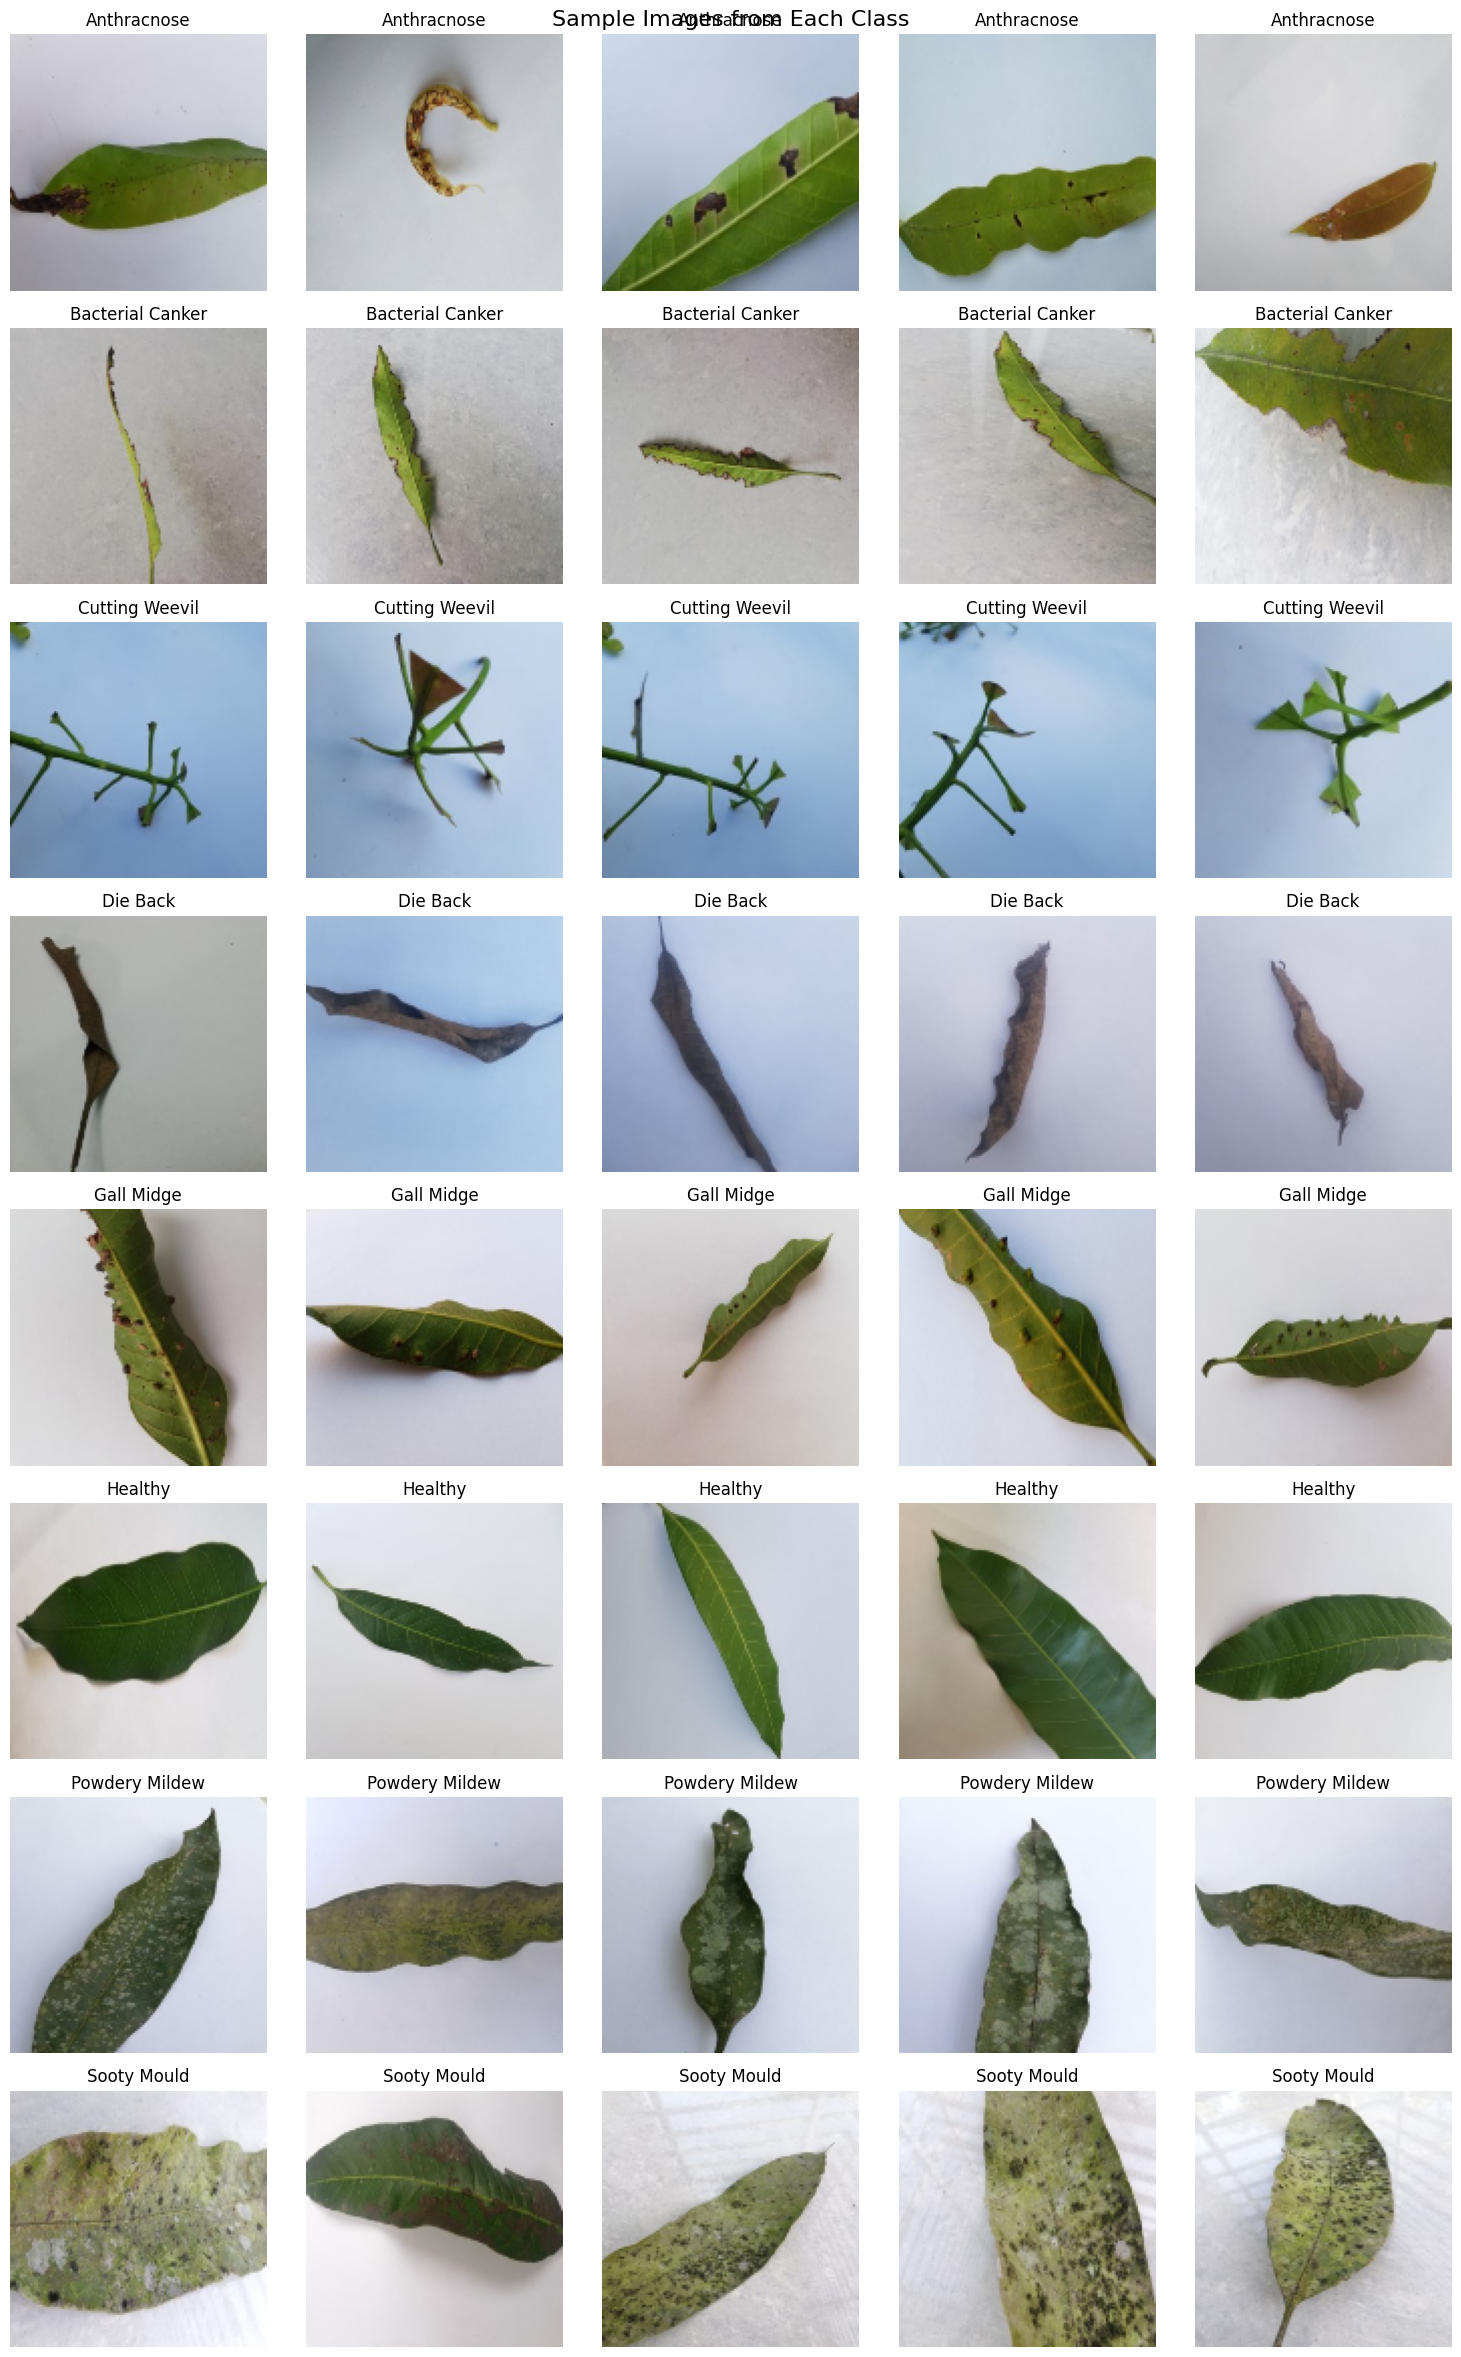

In [5]:
import random
import random

# Displaying 5 random images from each class
fig, ax = plt.subplots(len(classes), 5, figsize=(15, 6 * len(classes) // 2))  # Adjust figsize for more classes
classes = np.unique(labels)
for i, cls in enumerate(classes):
    cls_indices = np.where(labels == cls)[0]
    sample_images = random.sample(list(cls_indices), min(5, len(cls_indices)))  # Handle cases with fewer than 5 images
    for j, idx in enumerate(sample_images):
        ax[i, j].imshow(cv2.cvtColor(data[idx], cv2.COLOR_BGR2RGB))
        ax[i, j].axis("off")
        ax[i, j].set_title(cls)

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()  # Adjust subplot spacing
plt.show()

# The following block was indented incorrectly, causing the error
# It should be at the same level as the first 'for' loop
cls_indices = np.where(labels == cls)[0] #This line and the following block was indented incorrectly
sample_images = random.sample(list(cls_indices), 5) #Moved one indentation level back
for j, idx in enumerate(sample_images):
    ax[i, j].imshow(cv2.cvtColor(data[idx], cv2.COLOR_BGR2RGB))
    ax[i, j].axis("off")
    ax[i, j].set_title(cls)

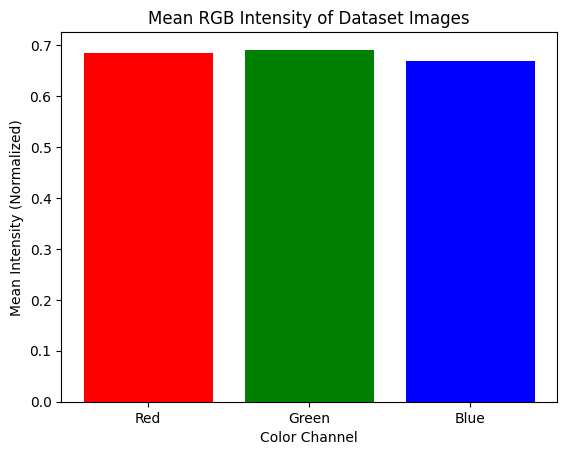

In [6]:
import matplotlib.pyplot as plt

# Flatten data to calculate mean for each RGB channel
mean_rgb = np.mean(data, axis=(0, 1, 2)) / 255  # normalize values
plt.bar(['Red', 'Green', 'Blue'], mean_rgb, color=['red', 'green', 'blue'])
plt.title("Mean RGB Intensity of Dataset Images")
plt.xlabel("Color Channel")
plt.ylabel("Mean Intensity (Normalized)")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reshape and normalize data
data_flattened = data.reshape(data.shape[0], -1) / 255.0  # Flatten and normalize
print(f"Flattened Data shape: {data_flattened.shape}")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels_encoded, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Flattened Data shape: (4010, 49152)
Training set size: (2807, 49152), Test set size: (1203, 49152)


Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.82      0.71      0.76       171
           2       0.89      0.94      0.91       150
           3       0.80      0.89      0.84       144
           4       0.46      0.47      0.46       148
           5       0.63      0.58      0.60       151
           6       0.68      0.59      0.63       156
           7       0.48      0.55      0.51       138

    accuracy                           0.68      1203
   macro avg       0.68      0.68      0.67      1203
weighted avg       0.68      0.68      0.68      1203

Decision Tree Accuracy: 0.6774729842061513


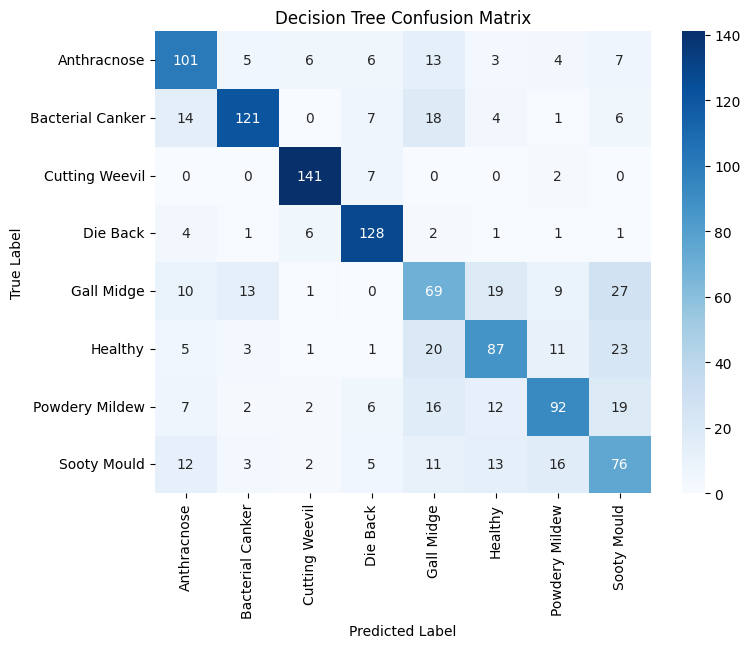

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       145
           1       0.94      0.86      0.90       171
           2       0.98      0.99      0.98       150
           3       0.97      0.94      0.96       144
           4       0.74      0.76      0.75       148
           5       0.90      0.87      0.89       151
           6       0.90      0.83      0.87       156
           7       0.70      0.81      0.75       138

    accuracy                           0.88      1203
   macro avg       0.88      0.88      0.88      1203
weighted avg       0.88      0.88      0.88      1203

Random Forest Accuracy: 0.8761429758935994


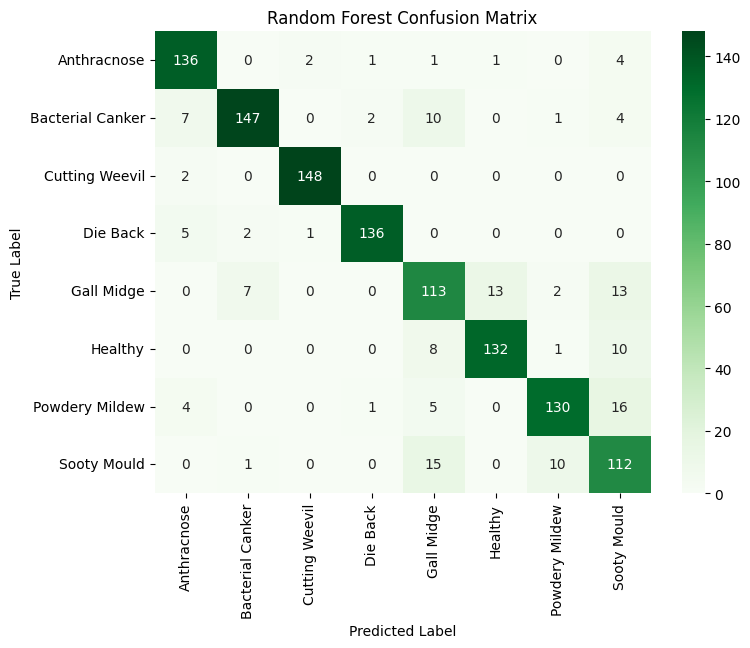

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Comparing Random Forest tree accuracy for n_estimators

   n_estimators  Mean Accuracy
0            50       0.841100
1           200       0.854287
2           250       0.856780


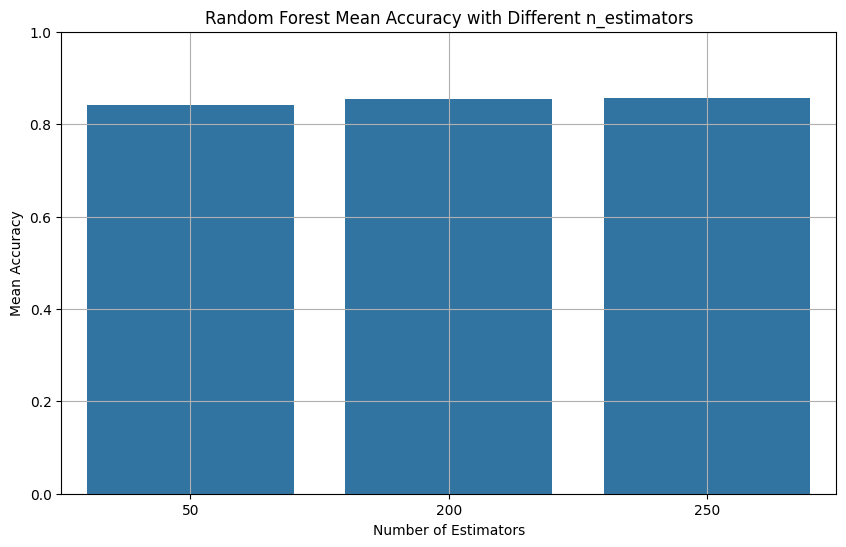

In [22]:
from sklearn.model_selection import cross_val_score

# Define the n_estimators values to evaluate
n_estimators_values = [50, 200, 250]
results = {}

# Loop through the n_estimators values
for n in n_estimators_values:
    # Initialize Random Forest model with the current n_estimators
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Perform cross-validation and store the accuracy scores
    scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
    results[n] = scores.mean()  # Store the mean accuracy

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
results_df.index.name = 'n_estimators'
results_df.reset_index(inplace=True)

# Print the results
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='n_estimators', y='Mean Accuracy', data=results_df)
plt.title('Random Forest Mean Accuracy with Different n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy
plt.grid()
plt.show()


Model Accuracy Comparison

<ipython-input-10-94c4cd55ae3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


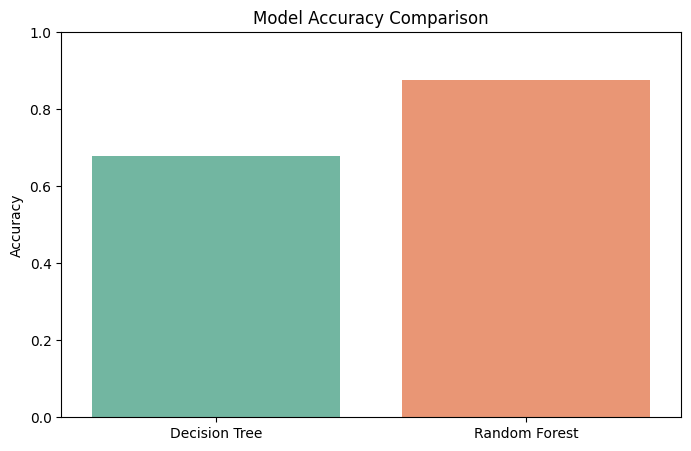

In [10]:
# Comparing accuracy scores
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

ROC Curve Comparison: Decision Tree vs Random Forest

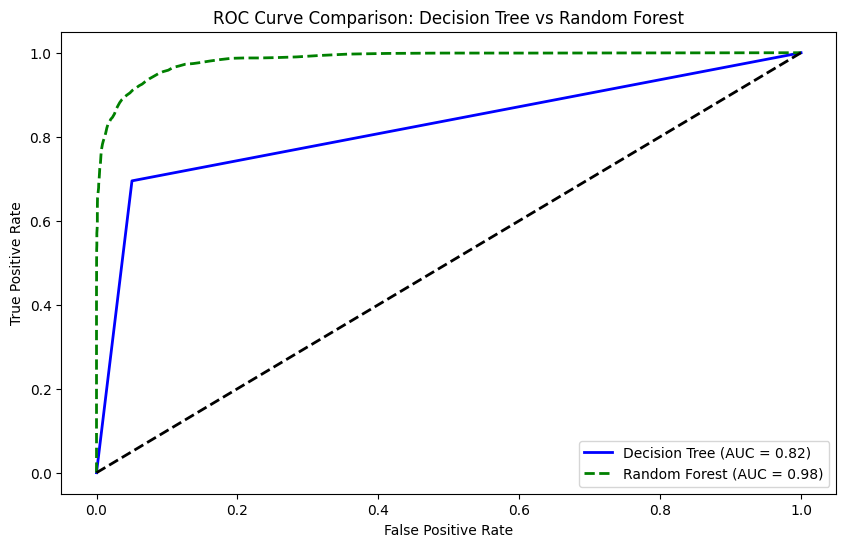

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Binarize the labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Wrap classifiers with OneVsRestClassifier for multiclass handling
dt_model_ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
rf_model_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Fit both models on the training set
dt_model_ovr.fit(X_train, y_train_binarized)
rf_model_ovr.fit(X_train, y_train_binarized)

# Initialize plot
plt.figure(figsize=(10, 6))

# Compute ROC curve and ROC area for Decision Tree (macro-average)
fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized.ravel(), dt_model_ovr.predict_proba(X_test).ravel())
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Compute ROC curve and ROC area for Random Forest (macro-average)
fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized.ravel(), rf_model_ovr.predict_proba(X_test).ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Decision Tree vs Random Forest')
plt.legend(loc='lower right')
plt.show()


ROC Curve Comparison for Each Class

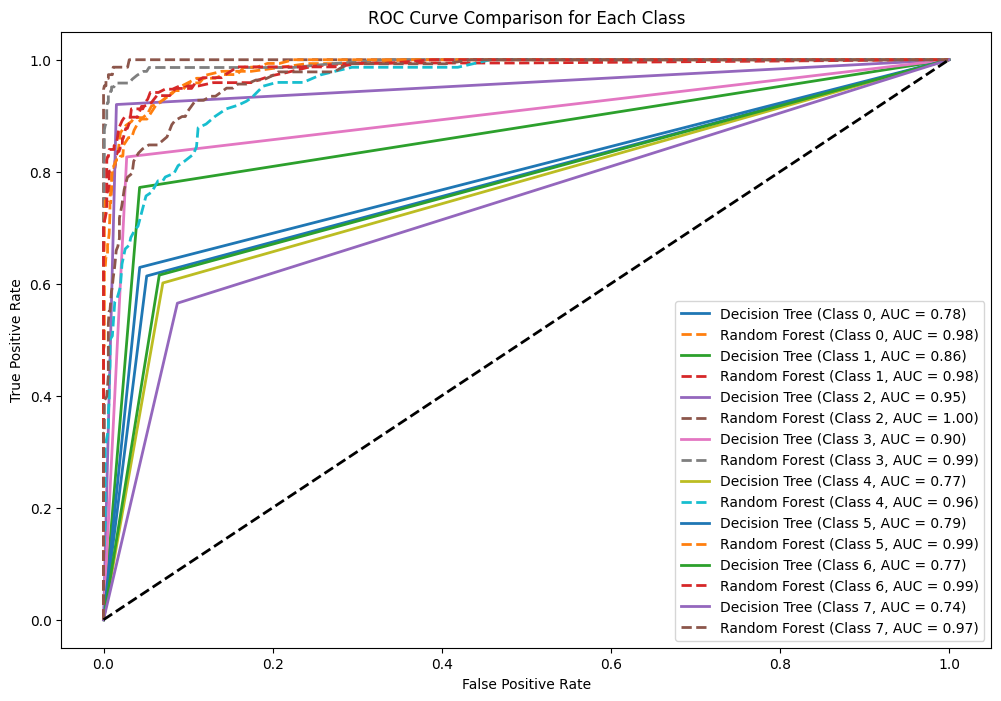

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Use OneVsRestClassifier for each model to handle multiclass ROC
dt_model_ovr = OneVsRestClassifier(dt_model)
rf_model_ovr = OneVsRestClassifier(rf_model)

# Fit both models on the entire training set
dt_model_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y_train)))
rf_model_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y_train)))

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))

for i in range(n_classes):
    # Decision Tree ROC curve for each class
    fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized[:, i], dt_model_ovr.predict_proba(X_test)[:, i])
    roc_auc_dt = auc(fpr_dt, tpr_dt)

    # Random Forest ROC curve for each class
    fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized[:, i], rf_model_ovr.predict_proba(X_test)[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Plotting
    plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree (Class {i}, AUC = {roc_auc_dt:.2f})')
    plt.plot(fpr_rf, tpr_rf, lw=2, linestyle='--', label=f'Random Forest (Class {i}, AUC = {roc_auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Each Class')
plt.legend(loc='lower right')
plt.show()


Learning Curve

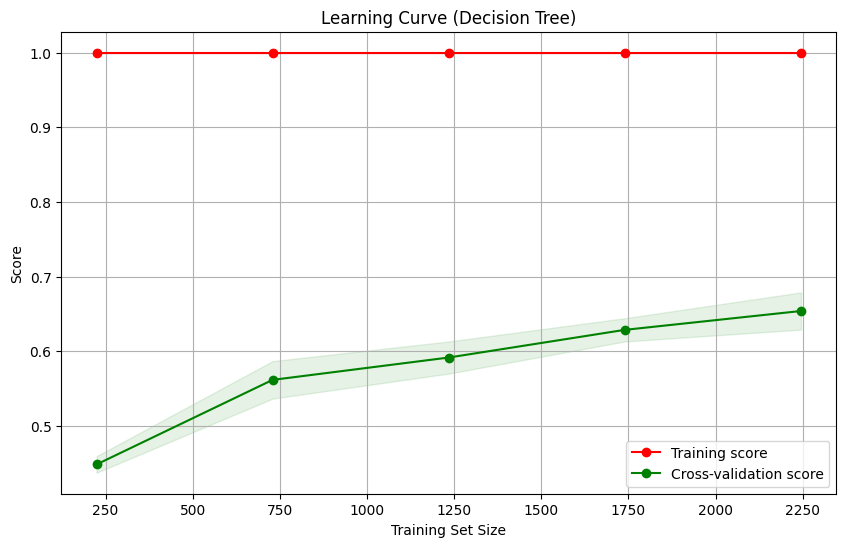

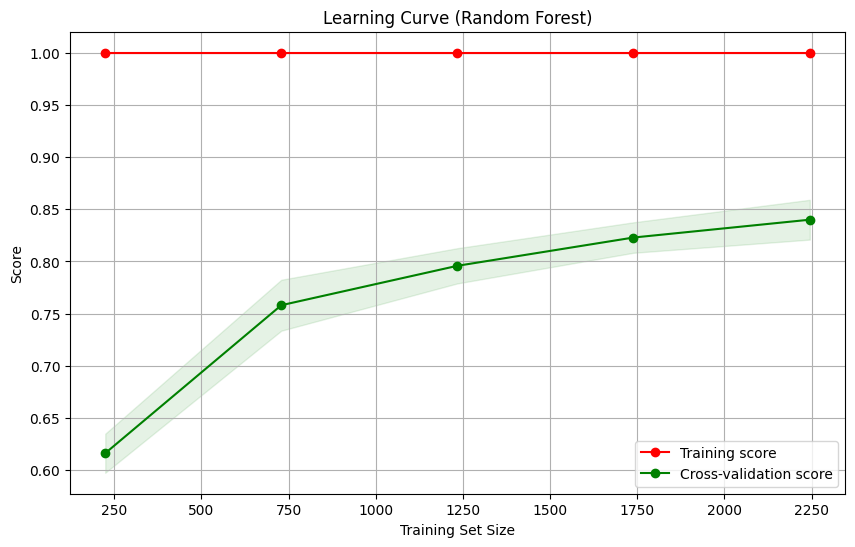

In [20]:
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Decision Tree
plot_learning_curve(DecisionTreeClassifier(random_state=42), "Learning Curve (Decision Tree)", X_train, y_train, cv=5)

# Plot learning curve for Random Forest
plot_learning_curve(RandomForestClassifier(n_estimators=50, random_state=42), "Learning Curve (Random Forest)", X_train, y_train, cv=5)


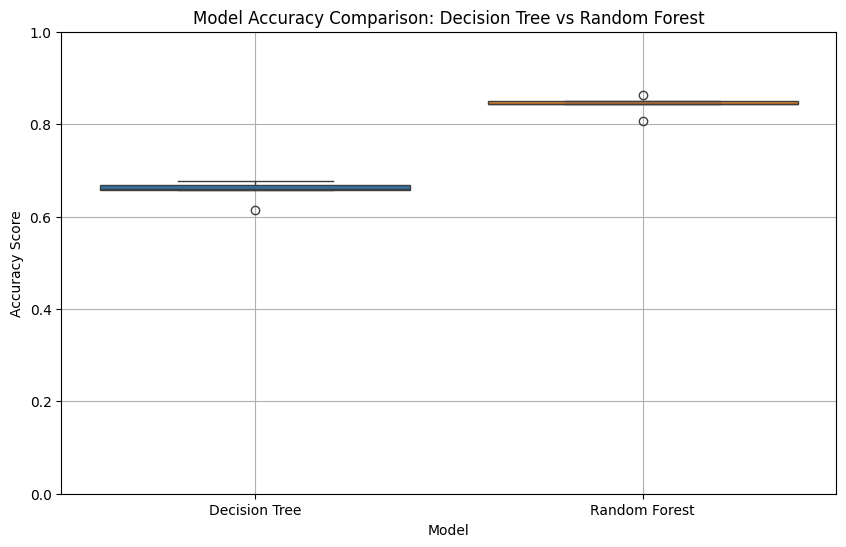

In [21]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform cross-validation
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Decision Tree': dt_scores,
    'Random Forest': rf_scores
})

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Model Accuracy Comparison: Decision Tree vs Random Forest')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy
plt.grid()
plt.show()
